In [1]:
# data manipulation
import numpy as np
import pandas as pd
# visualization
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
# printing results
import matplotlib.pyplot as plt
# encoding labels
from sklearn.preprocessing import LabelEncoder
# scaler
from sklearn.preprocessing import StandardScaler

In [80]:
ds = ['emodb', 'emovo', 'ravdess']

In [82]:
md = {}
for d in ds:
    # md[d] = pd.read_csv(f"/datasets/nicolas_facchinetti/processed_data/{d}/metadata_pre_aug.csv")
    
    md[d] = pd.read_csv(f"D:\\Scuola\\TesiMag\\thesis_adversarial_ml_audio\\processed_data/{d}/metadata_pre_aug.csv")

In [83]:
md['emodb']

,path,filename,chunk,label,actor,gender
0,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03a01Fa.wav,0,happy,3,m
1,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03a01Nc.wav,0,neutral,3,m
2,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03a01Wa.wav,0,angry,3,m
3,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03a02Fc.wav,0,happy,3,m
4,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03a02Nc.wav,0,neutral,3,m
...,...,...,...,...,...,...
675,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,16b10Tb.wav,1,sad,16,f
676,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,16b10Td.wav,0,sad,16,f
677,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,16b10Td.wav,1,sad,16,f
678,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,16b10Wa.wav,0,angry,16,f


In [87]:
sgrams = {}
for d in ds:
    # sgrams[d] = np.load(f"/datasets/nicolas_facchinetti/processed_data/{d}/sgram_pre_aug.npy")
    sgrams[d] = sgram_ravdess = np.load(f"D:\\Scuola\\TesiMag\\thesis_adversarial_ml_audio\\processed_data/{d}/sgram_pre_aug.npy")

np.shape(sgrams['emodb'])

(680, 128, 261)

Since the samples are in tabular form, flatten each samples' matrix to a row. Also standardize the data

In [89]:
for d in ds:
    sgrams[d] = [sample.flatten() for sample in sgrams[d]]
    scaler = StandardScaler()
    sgrams[d] = scaler.fit_transform(sgrams[d])

Define a function for plotting the scatter plots

In [73]:
import matplotlib.cm as cm

def print_axis(components, targets, classes): 
    scatter_x = components[:, 0]
    scatter_y = components[:, 1]
    group = np.array([1,3,2,1,3]) #targets
    
    colors = cm.rainbow(np.linspace(0, 1, len(classes)))
    plt.figure(figsize = (12,8))
    for g in np.unique(targets):
        ix = np.where(targets == g)
        plt.scatter(scatter_x[ix], scatter_y[ix], c = colors[g].reshape(1,-1), label = classes[g], s=20, alpha=0.6)
    plt.xlabel('component 1')
    plt.ylabel('component 2')
    plt.legend()

# PCA

In [93]:
def print_pca(metadata, logmelspectrograms):
    # Separating out the target
    y = metadata['label']
    #Scaling the feature columns
    encoder = LabelEncoder()
    y = encoder.fit_transform(y)
    
    # apply PCA to data
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(logmelspectrograms)
    print(f"Explained variance with 2 principal components {np.sum(pca.explained_variance_ratio_)}")
    
    print_axis(principalComponents, y, encoder.classes_)

Explained variance with 2 principal component 0.5520795664635477


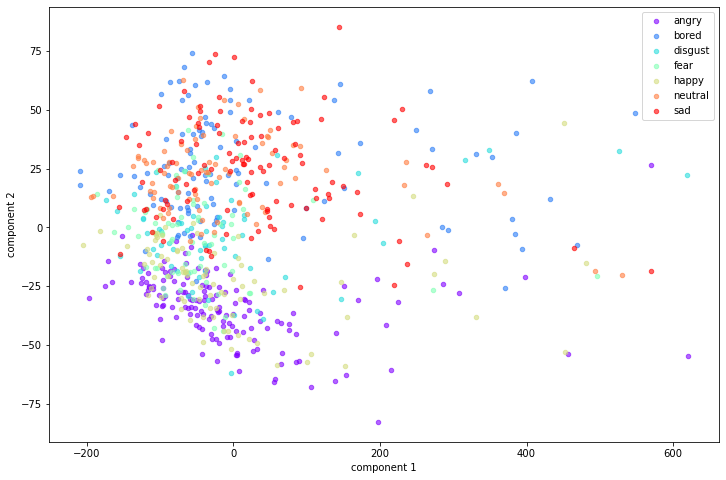

In [94]:
print_pca(md['emodb'], sgrams['emodb'])

Explained variance with 2 principal component 0.7096265398693296


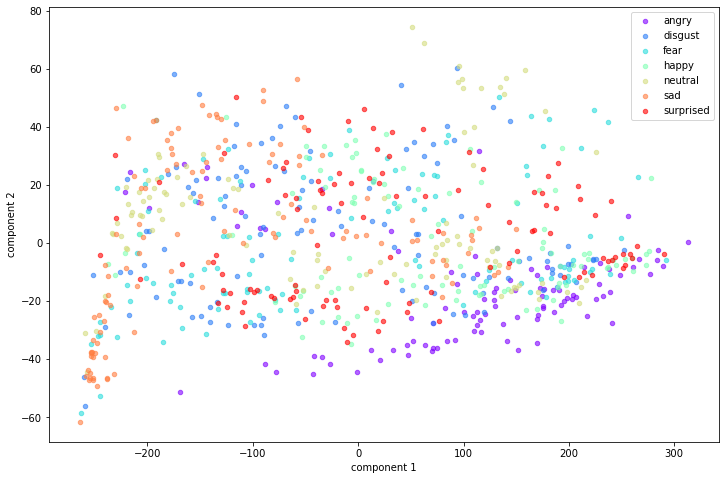

In [95]:
print_pca(md['emovo'], sgrams['emovo'])

Explained variance with 2 principal component 0.7429367178564941


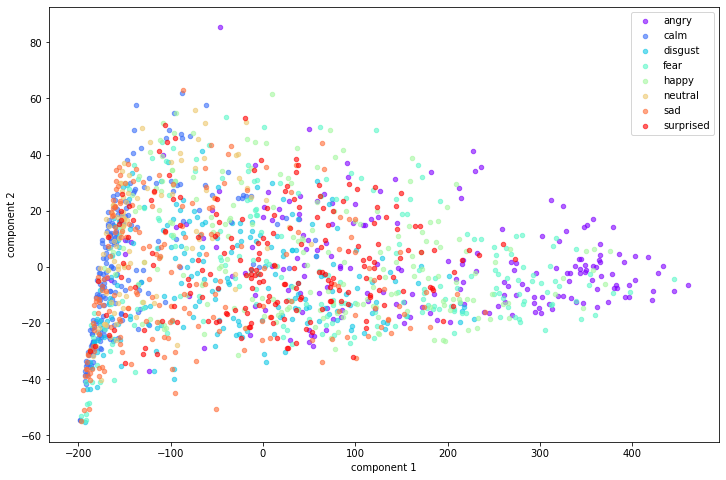

In [96]:
print_pca(md['ravdess'], sgrams['ravdess'])

# T-SNE

To further reduce the noise and speed-up the computation I let PCA to extract the number of principal components to explain at lest 90% of variance and use them as input for T-SNE.

In [129]:
def print_tsne(metadata, logmelspectrograms, per):
    # Separating out the target
    y = metadata['label']
    #Scaling the feature columns
    encoder = LabelEncoder()
    y = encoder.fit_transform(y)
    
    # apply PCA to data
    pca = PCA(0.9)
    principalComponents = pca.fit_transform(logmelspectrograms)
    print(f"Number of extracted components {pca.n_components_}")
    
    # no large datasets so exact and 3000 iter can be used
    # various perplexity as is the most influent parameter
    components = TSNE(n_components=2, perplexity=per, n_iter=3000, learning_rate='auto', method='exact', random_state= 1997, n_jobs=-1).fit_transform(principalComponents)
    print_axis(components, y, encoder.classes_)

Number of extracted components 256


C:\Users\Nicolas Facchinetti\.conda\envs\thesis\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


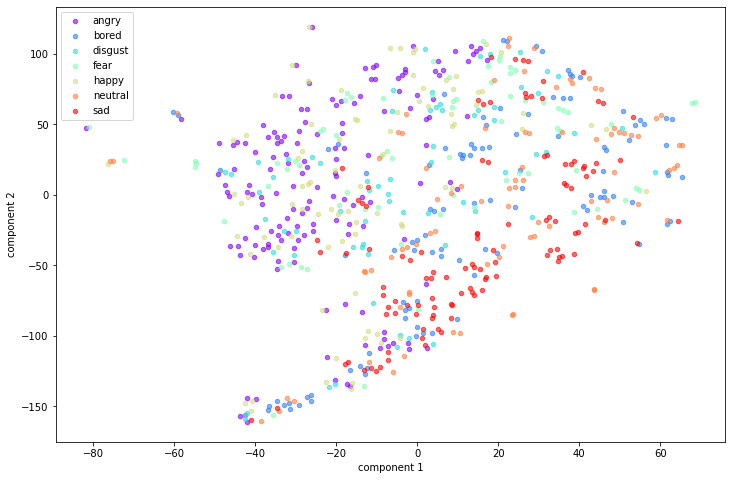

In [130]:
print_tsne(md['emodb'], sgrams['emodb'], 5)

Number of extracted components 256


C:\Users\Nicolas Facchinetti\.conda\envs\thesis\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


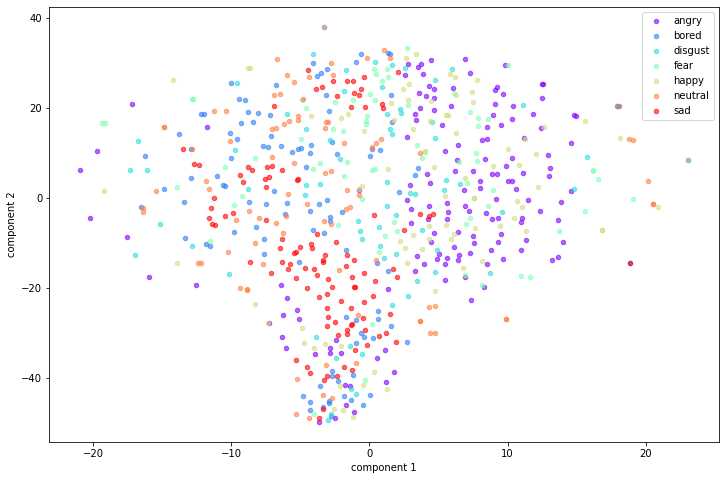

In [133]:
print_tsne(md['emodb'], sgrams['emodb'], 30)

Number of extracted components 256


C:\Users\Nicolas Facchinetti\.conda\envs\thesis\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


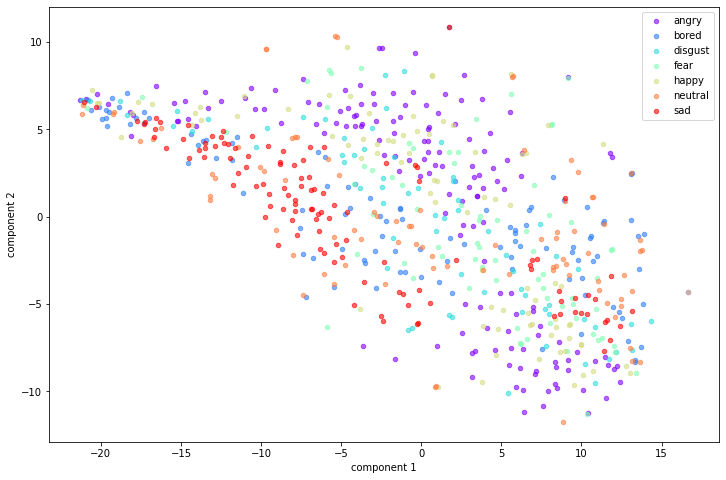

In [138]:
print_tsne(md['emodb'], sgrams['emodb'], 50)

Number of extracted components 168


C:\Users\Nicolas Facchinetti\.conda\envs\thesis\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


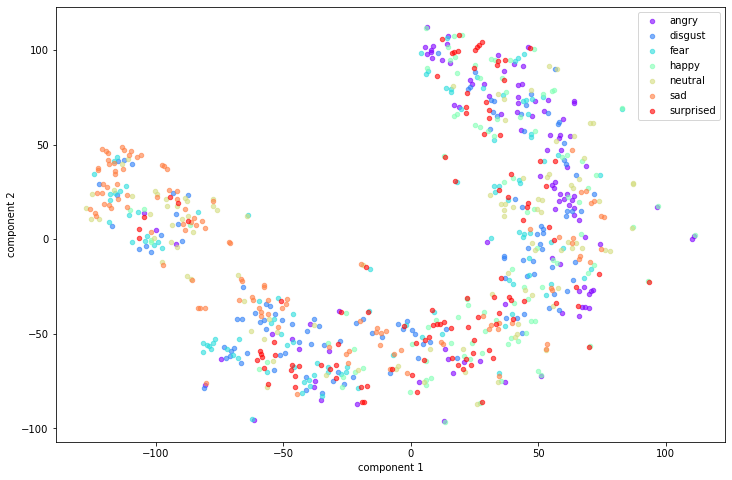

In [131]:
print_tsne(md['emovo'], sgrams['emovo'], 5)

Number of extracted components 168


C:\Users\Nicolas Facchinetti\.conda\envs\thesis\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


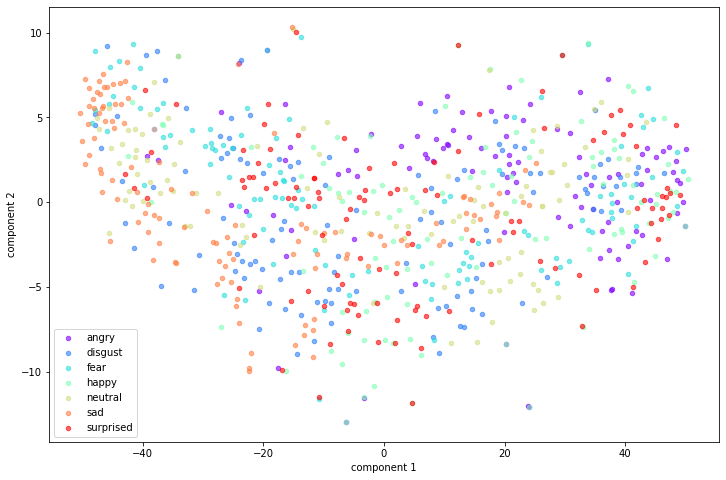

In [134]:
print_tsne(md['emovo'], sgrams['emovo'], 30)

Number of extracted components 168


C:\Users\Nicolas Facchinetti\.conda\envs\thesis\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


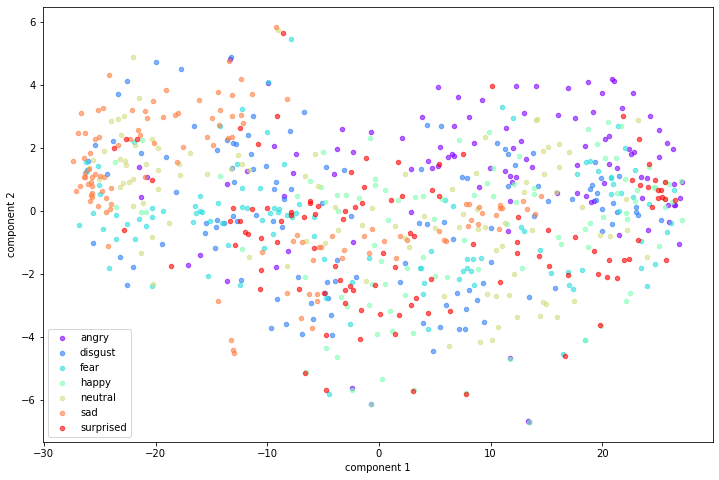

In [139]:
print_tsne(md['emovo'], sgrams['emovo'], 50)

Number of extracted components 156


C:\Users\Nicolas Facchinetti\.conda\envs\thesis\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


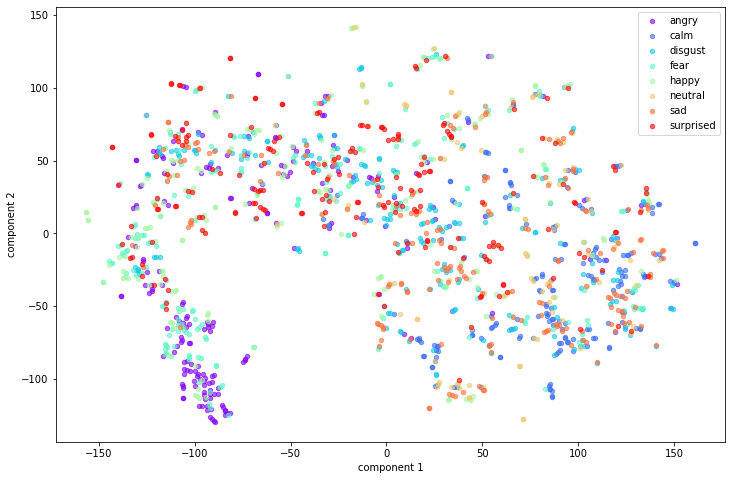

In [132]:
print_tsne(md['ravdess'], sgrams['ravdess'], 5)

Number of extracted components 156


C:\Users\Nicolas Facchinetti\.conda\envs\thesis\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


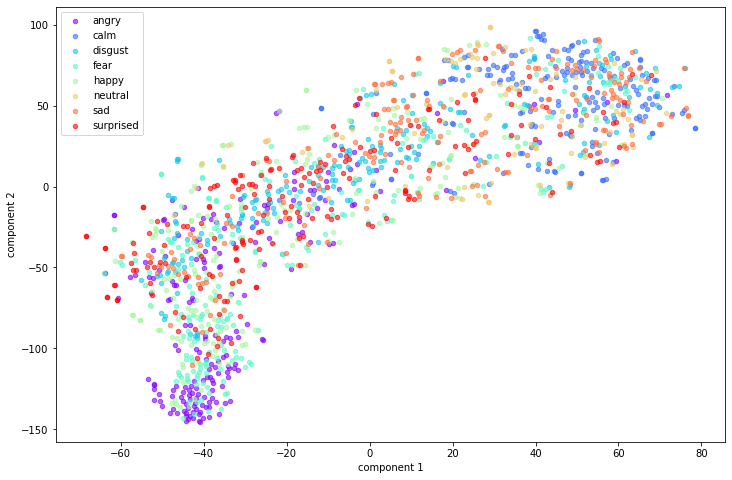

In [135]:
print_tsne(md['ravdess'], sgrams['ravdess'], 30)

Number of extracted components 156


C:\Users\Nicolas Facchinetti\.conda\envs\thesis\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


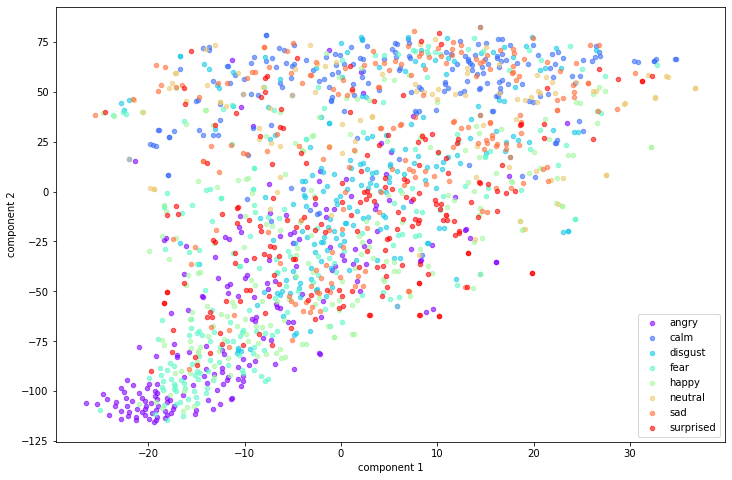

In [140]:
print_tsne(md['ravdess'], sgrams['ravdess'], 50)